In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set(style="darkgrid")

In [2]:
data=pd.read_csv("Mall_Customers.csv")
print("Dataset Shape:",data.shape)
data.head()

Dataset Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

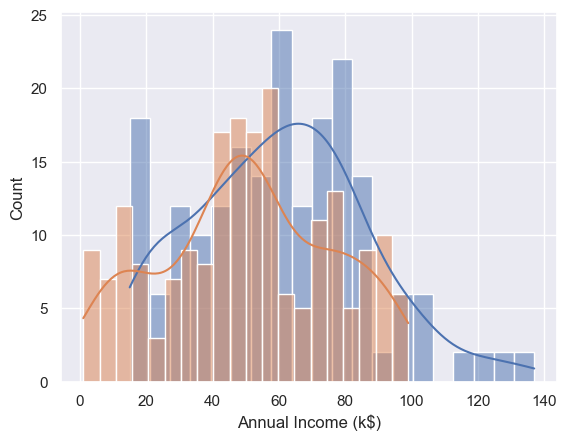

In [4]:
print(data.info())
print(data.describe())
 # Distribution plots
sns.histplot(data["Annual Income (k$)"], bins=20, kde=True)
sns.histplot(data["Spending Score (1-100)"], bins=20, kde=True)

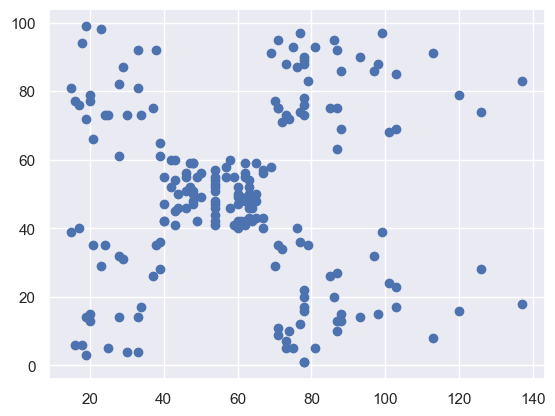

In [5]:
X=data[["Annual Income (k$)","Spending Score (1-100)"]]
plt.scatter(X.iloc[:,0],X.iloc[:,1])

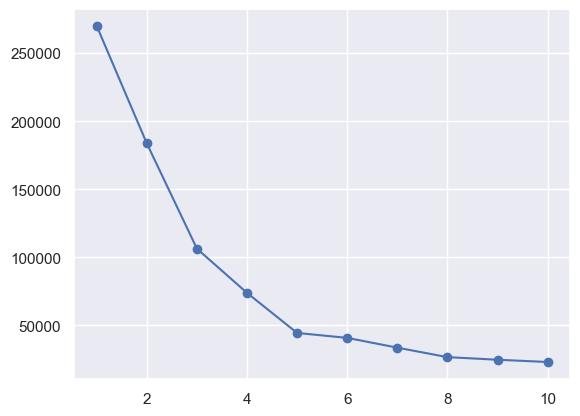

In [7]:
 wcss = []
 for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
 plt.plot(range(1,11), wcss, marker='o')


In [8]:
 kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
 y_kmeans = kmeans.fit_predict(X)
 data["Cluster"] = y_kmeans

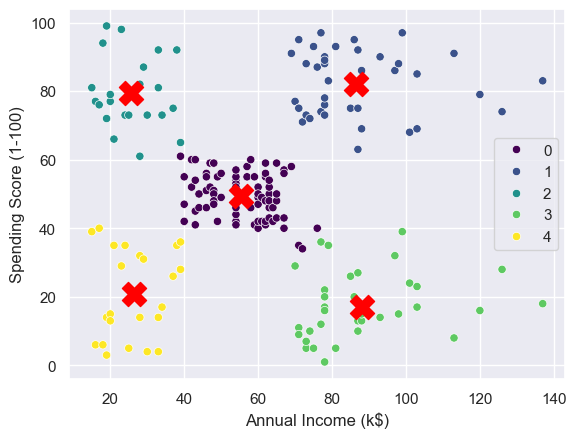

In [9]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y_kmeans, palette="viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="red", marker="X")